1、综合练习
做相关的热图。给定的delta.xlsx文件是记录了某次实验测量的一些问卷信息，尝试计算量表之间的相关性，并将结果可视化出来，将显著性介于0.05~0.01的用一颗标注出来，0.01～0.001的用2颗标注，小于0.001的使用***进行标注
请把代码补充完整

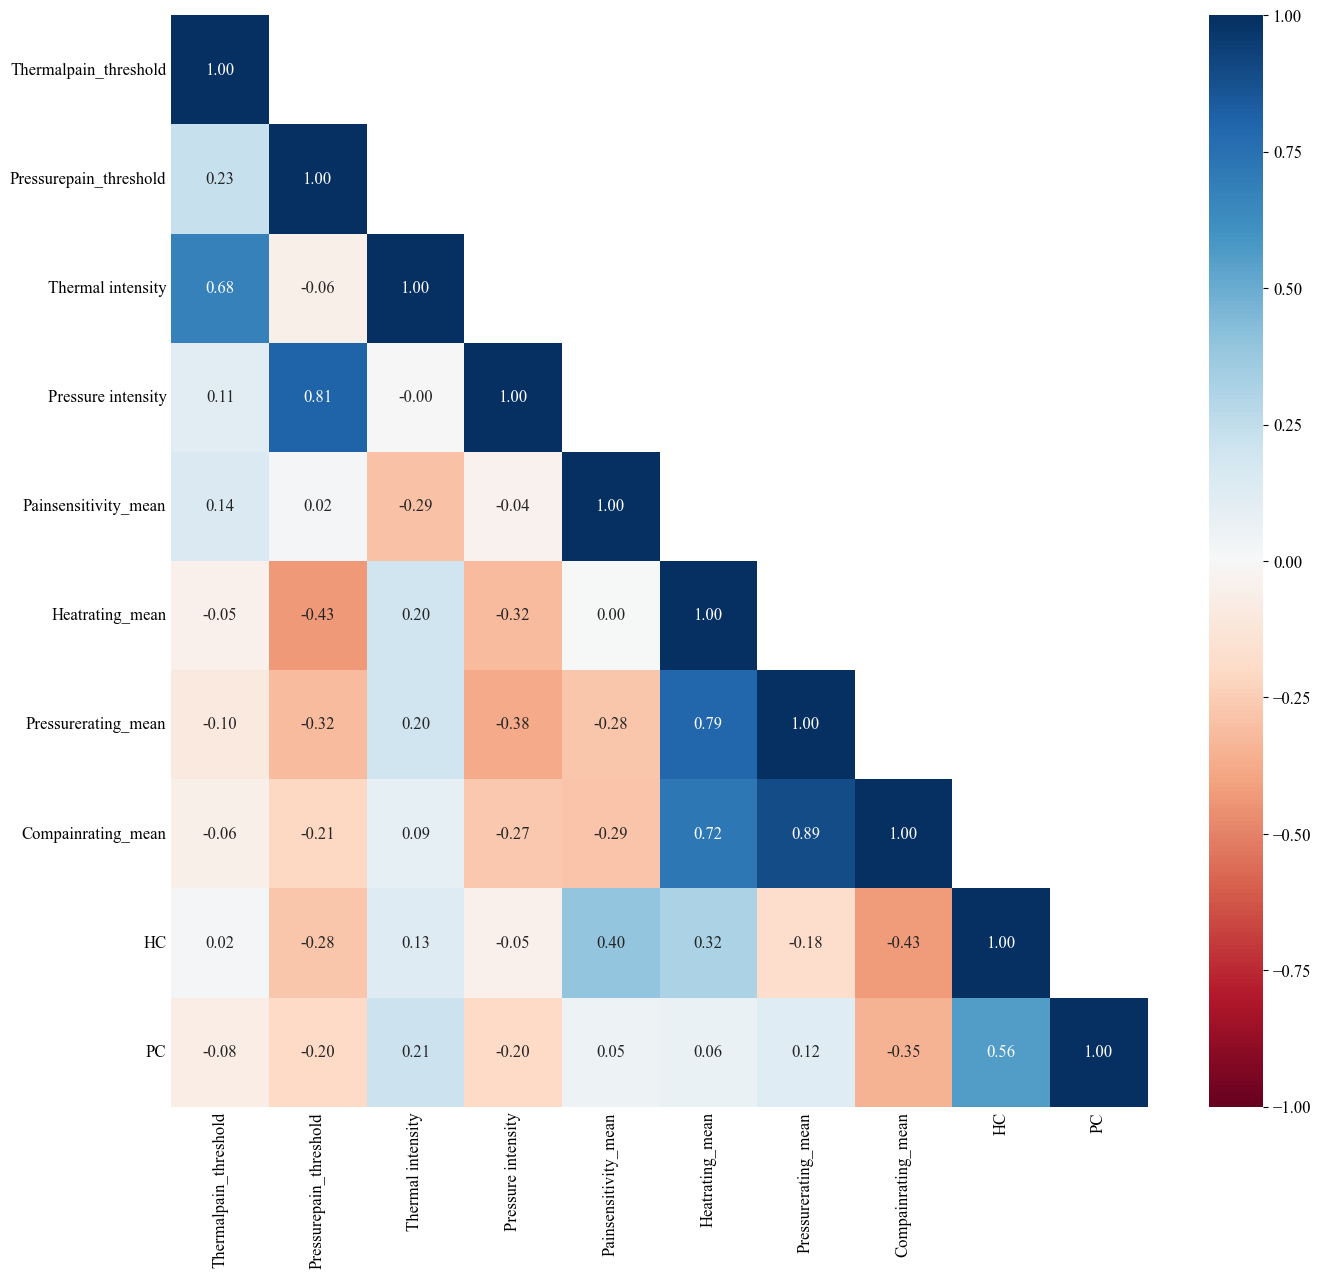

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import matplotlib as mpl

def cm2inch(x,y):
    return x/2.54,y/2.54

size1 = 12
mpl.rcParams.update(
{
'text.usetex': False,
'font.family': 'stixgeneral',
'mathtext.fontset': 'stix',
"font.family":'serif',
"font.size": size1,
"font.serif": ['Times New Roman'],
}
)
fontdict = {'weight': 'bold','size':size1,'family':'SimHei'}


fp = r'delta.xlsx'
df = pd.read_excel(fp,sheet_name='相关',header = 0)
df = df.dropna()
df_coor=df.corr()
fig = plt.figure(figsize=(cm2inch(40,36)))
ax1 = plt.gca()

#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask)-1)*(-1)
mask = np.rot90(mask,k = -1)

# for i in range(len(df_coor)):
#     for j in range(len(df_coor)):
#         if df_coor[i][j] < 0.001:
#             df_coor[i][j] = '***'
#         elif df_coor[i][j] >= 0.001 and df_coor < 0.01:
#             df_coor[i][j] = '**'
#         elif df_coor[i][j] >= 0.01 and df_coor < 0.05:
#             df_coor[i][j] = '*'

im1 = sns.heatmap(df_coor,annot=True,cmap="RdBu"
, mask=mask#构造mask，去除重复数据显示
,vmax=1,vmin=-1
, fmt='.2f',ax = ax1)

ax1.tick_params(axis = 'both', length=0)



2、